In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

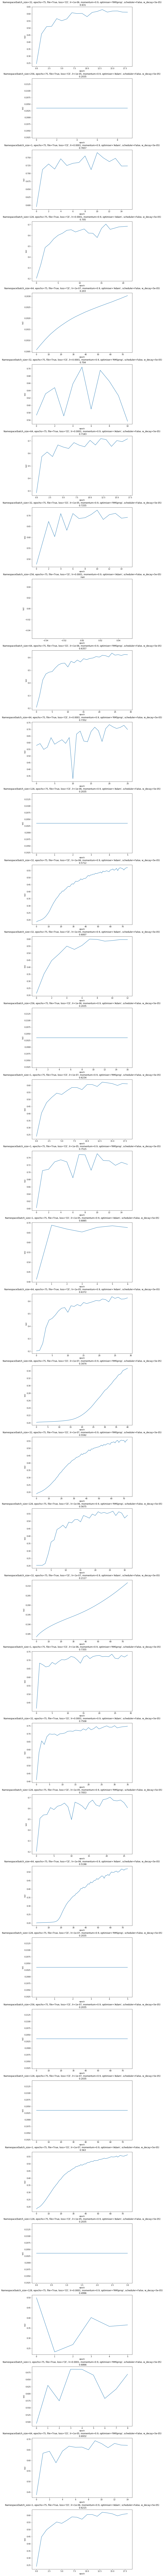

In [28]:
# data = pd.read_csv("FCNResults.csv") 
# data.head()
model_parameters = ""
index = 1
plt.figure(figsize=(10, 200))
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=0.999, wspace=None, hspace=None)
plt.tight_layout()
topmodels = {}
allmodels = {}
for filename in os.listdir("experiment_results_fcn"):    
    plt.subplot(len(os.listdir("experiment_results_fcn")), 1, index)
    data = pd.read_csv("experiment_results_fcn/" + filename, skiprows=[0]) 
    with open("experiment_results_fcn/" + filename) as f:
        model_parameters = f.readline() 
    # print(model_parameters)
    # display(data.head())
    ax = sns.lineplot(x="epoch", y="IoU", data=data)
    ax.set_title(model_parameters + "  " + str(round(data['IoU'].max(),4)))
    index = index + 1
    if(data['IoU'].max() > 0.65):
        topmodels[model_parameters] = data['IoU'].max()
    if data['IoU'].max() > 0:
        allmodels[model_parameters] = data['IoU'].max()
plt.show()

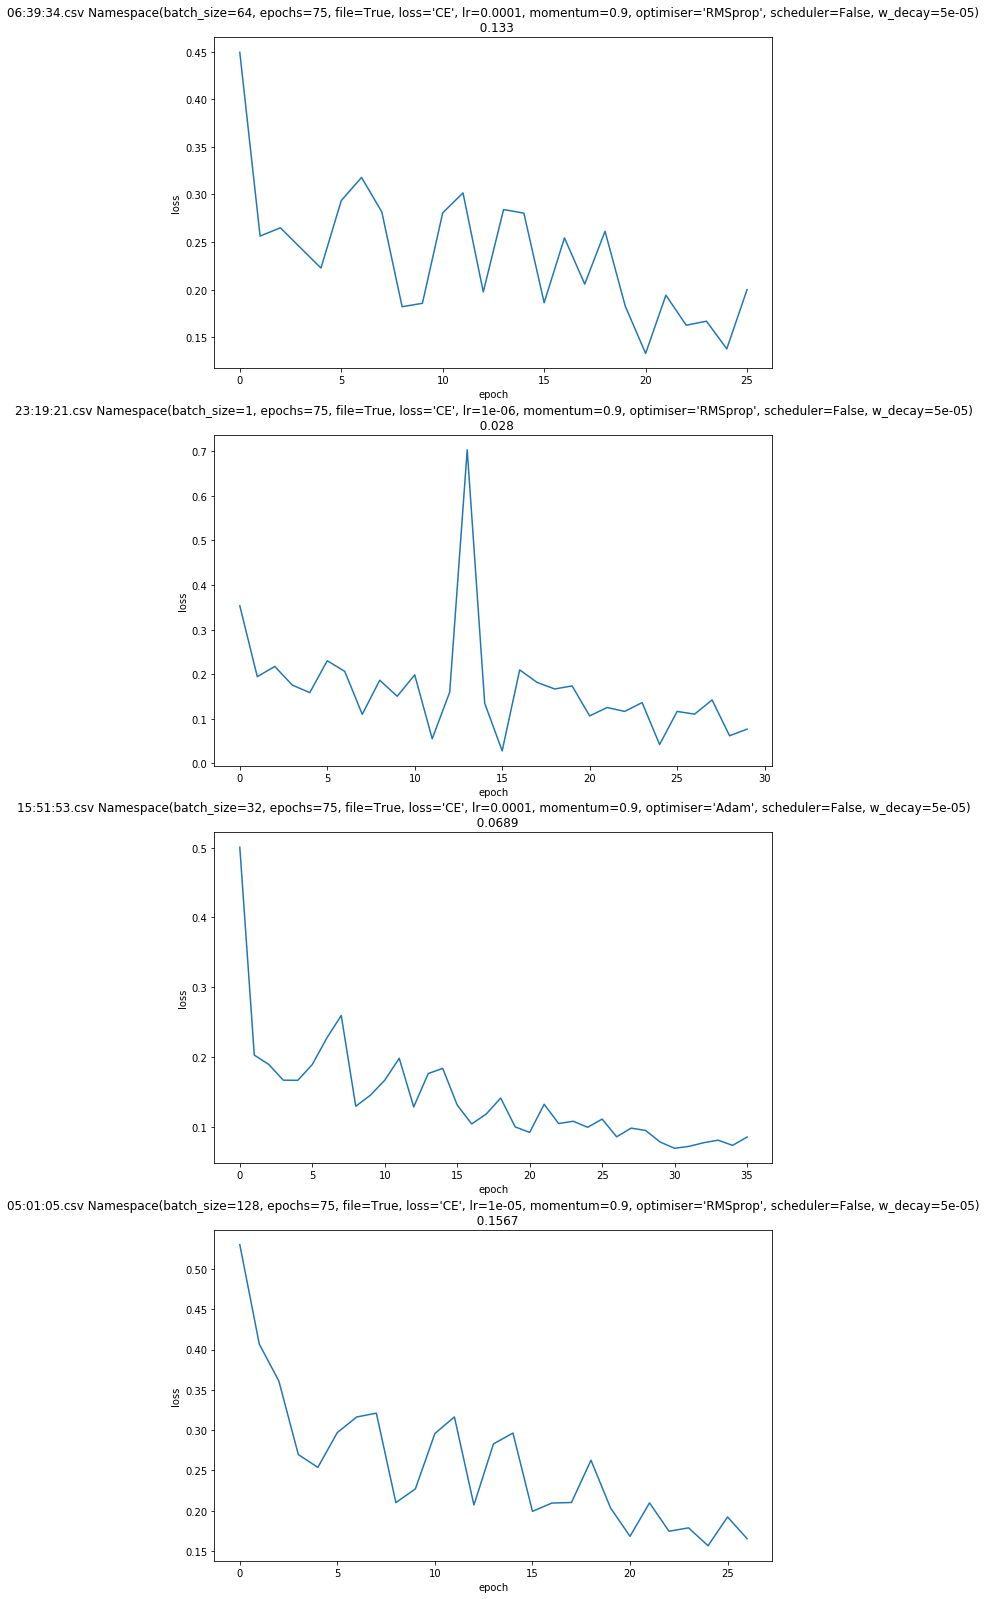

In [3]:
# data = pd.read_csv("FCNResults.csv") 
# data.head()
model_parameters = ""
index = 1
plt.figure(figsize=(10, 200))
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=0.999, wspace=None, hspace=None)
plt.tight_layout()
# topmodels = {}
# shitemodels = {}
for filename in os.listdir("experiment_results_fcn"):    
    
        data = pd.read_csv("experiment_results_fcn/" + filename, skiprows=[0])
#         if(data['IoU'].max() > 0.65):
#             topmodels[model_parameters] = data['IoU'].max()
#         if(data['IoU'].max() < 0.64):
#             shitemodels[model_parameters] = data['IoU'].max()
        
        if(len(data) > 25 and data['IoU'].max() > 0.65):
            plt.subplot(len(os.listdir("experiment_results_fcn")), 1, index)
            with open("experiment_results_fcn/" + filename) as f:
                model_parameters = f.readline() 

            ax = sns.lineplot(x="epoch", y="loss", data=data)
            ax.set_title(filename + " " + model_parameters + "  " + str(round(data['loss'].min(),4)))
            index = index + 1

plt.show()

# Top Models

In [14]:
import operator
tops = reversed(sorted(topmodels.items(), key=operator.itemgetter(1)))
for top in tops:
    print(top)
    print()
    print("*"*40)
    print()

("Namespace(batch_size=1, epochs=75, file=True, loss='CE', lr=0.0001, momentum=0.9, optimiser='Adam', scheduler=False, w_decay=5e-05)\n", 0.7656899755541146)

****************************************

("Namespace(batch_size=1, epochs=75, file=True, loss='CE', lr=1e-05, momentum=0.9, optimiser='RMSprop', scheduler=False, w_decay=5e-05)\n", 0.7514652340822557)

****************************************

("Namespace(batch_size=32, epochs=75, file=True, loss='CE', lr=0.0001, momentum=0.9, optimiser='Adam', scheduler=False, w_decay=5e-05)\n", 0.7507853987635962)

****************************************

("Namespace(batch_size=1, epochs=75, file=True, loss='CE', lr=1e-06, momentum=0.9, optimiser='RMSprop', scheduler=False, w_decay=5e-05)\n", 0.7355351935655953)

****************************************

("Namespace(batch_size=64, epochs=75, file=True, loss='CE', lr=0.0001, momentum=0.9, optimiser='RMSprop', scheduler=False, w_decay=5e-05)\n", 0.7352179250693055)

****************************

python3 train_fcn8s_at_once.py --batch_size 1 --epochs 75 --loss CE --lr 0.0001 --optimiser Adam

python3 train_fcn8s_at_once.py --batch_size 1 --epochs 75 --loss CE --lr 0.00001 --optimiser RMSProp

python3 train_fcn8s_at_once.py --batch_size 32 --epochs 75 --loss CE --lr 0.0001 --optimiser Adam

python3 train_fcn8s_at_once.py --batch_size 1 --epochs 75 --loss CE --lr 0.000001 --optimiser RMSProp

python3 train_fcn8s_at_once.py --batch_size 64 --epochs 75 --loss CE --lr 0.0001 --optimiser RMSProp

python3 train_fcn8s_at_once.py --batch_size 32 --epochs 75 --loss CE --lr 0.000001 --optimiser RMSProp

# Batch Sizes

In [30]:
import operator
alls = reversed(sorted(allmodels.items(), key=operator.itemgetter(1)))
for all1 in alls:
    print(all1[0].split('(')[1].split(',')[0] + "\t" + str(all1[1]))#.split('(')[1])#.split(',')[0])

batch_size=1	0.7656899755541146
batch_size=1	0.7514652340822557
batch_size=32	0.7507853987635962
batch_size=1	0.7355351935655953
batch_size=64	0.7352179250693055
batch_size=32	0.7254851860779826
batch_size=64	0.7182976430463403
batch_size=128	0.7052706461491098
batch_size=128	0.7050437286667133
batch_size=32	0.7039777696242523
batch_size=64	0.6931517342285932
batch_size=1	0.6884544162260362
batch_size=1	0.6865957631187741
batch_size=64	0.6372002763526391
batch_size=64	0.6357498941664804
batch_size=32	0.6310086055735921
batch_size=1	0.6234090869075857
batch_size=1	0.6214681929391335
batch_size=32	0.6006707821685052
batch_size=32	0.5712344009943423
batch_size=128	0.5675414565207664
batch_size=1	0.5630334899420809
batch_size=32	0.5591785976995998
batch_size=64	0.5198338160395806
batch_size=128	0.4996092560139071
batch_size=64	0.3473702236875422
batch_size=32	0.2117289188855785
batch_size=128	0.20352602871981532
batch_size=128	0.20352602871981532
batch_size=256	0.20352602871981532
batch_si

# Learning Rates

In [35]:
import operator
alls = reversed(sorted(allmodels.items(), key=operator.itemgetter(1)))
for all1 in alls:
    print(all1[0].split('(')[1].split(',')[4] + "\t" + str(all1[1]))#.split('(')[1])#.split(',')[0])

 lr=0.0001	0.7656899755541146
 lr=1e-05	0.7514652340822557
 lr=0.0001	0.7507853987635962
 lr=1e-06	0.7355351935655953
 lr=0.0001	0.7352179250693055
 lr=1e-05	0.7254851860779826
 lr=0.0001	0.7182976430463403
 lr=1e-05	0.7052706461491098
 lr=0.0001	0.7050437286667133
 lr=0.0001	0.7039777696242523
 lr=1e-05	0.6931517342285932
 lr=1e-05	0.6884544162260362
 lr=0.0001	0.6865957631187741
 lr=1e-05	0.6372002763526391
 lr=1e-06	0.6357498941664804
 lr=1e-06	0.6310086055735921
 lr=1e-07	0.6234090869075857
 lr=1e-06	0.6214681929391335
 lr=1e-05	0.6006707821685052
 lr=1e-06	0.5712344009943423
 lr=1e-06	0.5675414565207664
 lr=1e-07	0.5630334899420809
 lr=1e-07	0.5591785976995998
 lr=1e-06	0.5198338160395806
 lr=0.0001	0.4996092560139071
 lr=1e-07	0.3473702236875422
 lr=1e-07	0.2117289188855785
 lr=1e-05	0.20352602871981532
 lr=1e-07	0.20352602871981532
 lr=1e-07	0.20352602871981532
 lr=1e-07	0.20352602871981532
 lr=1e-06	0.20352602871981532
 lr=1e-06	0.20352602871981532
 lr=1e-05	0.20352602871981532